In [2]:
import math
import matplotlib.pyplot as plt
from functools import partial

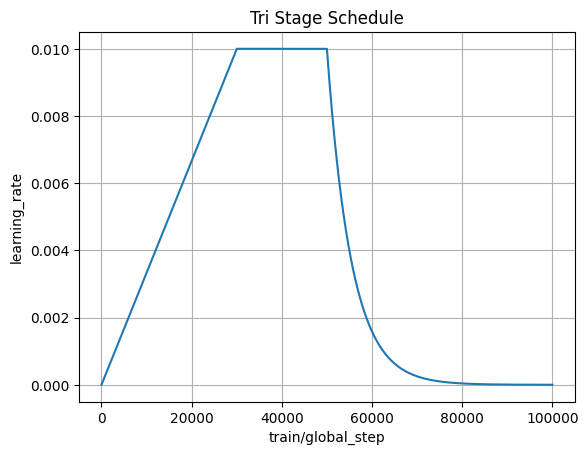

In [3]:
def _get_tri_stage_schedule_with_warmup_lr_lambda(
    current_step: int,
    num_warmup_steps: int,
    num_hold_steps: int,
    num_decay_steps: int,
    decay_factor: float,
    final_learning_rate: float,
) -> float:
    if current_step < num_warmup_steps:  # stage 1: warmup
        return float(current_step) / float(max(1, num_warmup_steps))
    elif current_step < (num_warmup_steps + num_hold_steps):  # stage 2: hold
        return 1.0
    elif current_step < (num_warmup_steps + num_hold_steps + num_decay_steps):  # stage 3: decay
        decay_steps = current_step - (num_warmup_steps + num_hold_steps)
        decay_rate = math.log(decay_factor) / num_decay_steps
        return float(math.exp(decay_rate * decay_steps))
    else:  # stage 4: final
        return final_learning_rate


learning_rate = 0.01
num_training_steps = 100000
num_warmup_steps = int(num_training_steps * 0.3)
num_hold_steps = 0.2
num_decay_steps = 0.5
final_learning_rate = learning_rate * 0.0001

if isinstance(num_hold_steps, float):
    num_hold_steps = int(num_training_steps * num_hold_steps)

if isinstance(num_decay_steps, float):
    num_decay_steps = int(num_training_steps * num_decay_steps)

decay_factor = final_learning_rate / learning_rate

lr_lambda = partial(
    _get_tri_stage_schedule_with_warmup_lr_lambda,
    num_warmup_steps=num_warmup_steps,
    num_hold_steps=num_hold_steps,
    num_decay_steps=num_decay_steps,
    final_learning_rate=final_learning_rate / learning_rate,
    decay_factor=decay_factor,
)

lr_ls = [lr_lambda(current_step=x + 1) * learning_rate for x in range(num_training_steps)]
plt.plot(lr_ls)
plt.xlabel("train/global_step")
plt.ylabel("learning_rate")
plt.title("Tri Stage Schedule")
plt.grid(True)
plt.show()